In [37]:
import numpy as np 
import matplotlib.pyplot as plt

from sklearn import metrics
import seaborn as sns

# Usado funpara manipular los datasets de MNIST
from struct import unpack


In [38]:
def loadmnist(imagefile, labelfile):

    # Abrir datos binarios
    images = open(imagefile, 'rb')
    labels = open(labelfile, 'rb')

    # Obtener metadatos para las imagenes
    images.read(4) 
    number_of_images = images.read(4)
    number_of_images = unpack('>I', number_of_images)[0]
    rows = images.read(4)
    rows = unpack('>I', rows)[0]
    cols = images.read(4)
    cols = unpack('>I', cols)[0]

    # Obtener metadatos para labels
    labels.read(4)
    N = labels.read(4)
    N = unpack('>I', N)[0]

    # Obtener datos
    x = np.zeros((N, rows*cols), dtype=np.uint8)  
    y = np.zeros(N, dtype=np.uint8) 
    for i in range(N):
        for j in range(rows*cols):
            tmp_pixel = images.read(1)  # Solo un unico byte
            tmp_pixel = unpack('>B', tmp_pixel)[0]
            x[i][j] = tmp_pixel
        tmp_label = labels.read(1)
        y[i] = unpack('>B', tmp_label)[0]

    images.close()
    labels.close()
    return (x, y)

In [39]:
x_train, y_train = loadmnist('data/train-images-idx3-ubyte'
                                 , 'data/train-labels-idx1-ubyte')
x_test, y_test = loadmnist('data/t10k-images-idx3-ubyte'
                               , 'data/t10k-labels-idx1-ubyte')

In [41]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [43]:
y_pred=dt.predict(x_test)

In [44]:
y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [45]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       980
           1       0.95      0.96      0.96      1135
           2       0.86      0.85      0.86      1032
           3       0.82      0.86      0.84      1010
           4       0.88      0.88      0.88       982
           5       0.85      0.84      0.85       892
           6       0.89      0.89      0.89       958
           7       0.91      0.90      0.90      1028
           8       0.83      0.80      0.81       974
           9       0.86      0.85      0.86      1009

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



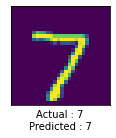

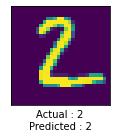

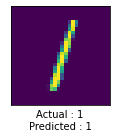

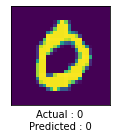

In [49]:
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[i].reshape(28,28))
    plt.xlabel(f'Actual : {y_test[i]}\nPredicted : {y_pred[i]}')
    plt.show()